In [1]:
#Source for DBSCAN code: https://www.youtube.com/watch?v=5cOhL4B5waU&t=918s

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean

import numpy as np
import numpy.matlib

plt.style.use('ggplot')
%matplotlib inline

200

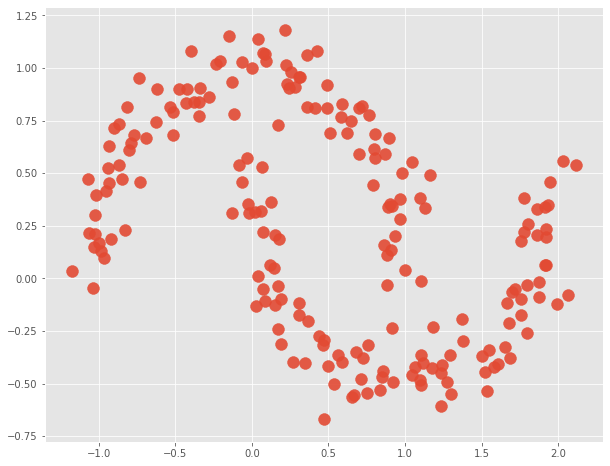

In [3]:
X, label = make_moons(n_samples=200, noise=0.1,random_state=19)
#print(X[:5,])
fig, ax = plt.subplots(figsize=(10,8))
sctr1 = ax.scatter(X[:,0],X[:,1],s=140,alpha=0.9)
len(X)

Knee of the curve is at index = 162
Knee value = [163.           0.26893279]


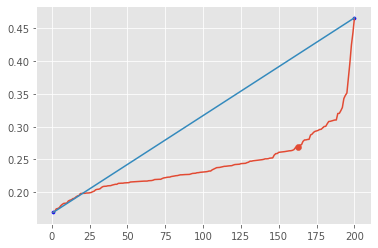

In [4]:
#Using a kNN distance plot to find eps
#Using k=12
#Source - https://scikit-learn.org/stable/modules/neighbors.html
nbrs = NearestNeighbors(n_neighbors=12).fit(X)
distances, indices = nbrs.kneighbors(X)
#print(distances)
sortedDistancesInc = sorted(distances[:,11],reverse=False)
plt.plot(list(range(1,len(X)+1)), sortedDistancesInc)
#plt.show()

#Figuring out how to automatically get epsilon from the graph
#The elbow point is the point on the curve with the maximum absolute second derivative 
#Source: https://dataplatform.cloud.ibm.com/analytics/notebooks/54d79c2a-f155-40ec-93ec-ed05b58afa39/view?access_token=6d8ec910cf2a1b3901c721fcb94638563cd646fe14400fecbb76cea6aaae2fb1

x = list(range(1,len(X)+1))
y = sortedDistancesInc
kNNdata = np.vstack((x,y)).T
nPoints = len(x)
#print(kNNdata)

#Drawing a line from the first point to the last point on the curve 
firstPoint = kNNdata[0]
lastPoint = kNNdata[-1]
plt.scatter(firstPoint[0],firstPoint[1], c='blue',s=10)
plt.scatter(lastPoint[0],lastPoint[1], c='blue',s=10)
lv = lastPoint - firstPoint #Finding a vector between the first and last point
lvn = lv/np.linalg.norm(lv)#Normalizing the vector
plt.plot([firstPoint[0],lastPoint[0]],[firstPoint[1],lastPoint[1]])
#plt.show()

#Finding the distance to the line 
vecFromFirst = kNNdata - firstPoint
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lvn, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lvn)
vecToLine = vecFromFirst - vecFromFirstParallel

# distance to line is the norm of vecToLine
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

# knee/elbow is the point with max distance value
idxOfBestPoint = np.argmax(distToLine)

print ("Knee of the curve is at index =",idxOfBestPoint)
print ("Knee value =", kNNdata[idxOfBestPoint])

plt.scatter(kNNdata[idxOfBestPoint][0],kNNdata[idxOfBestPoint][1])
plt.show()


In [5]:
#DBSCAN
model = DBSCAN(eps=kNNdata[idxOfBestPoint][1],min_samples=12).fit(X)
print(model)

DBSCAN(algorithm='auto', eps=0.2689327859651778, leaf_size=30,
       metric='euclidean', metric_params=None, min_samples=12, n_jobs=None,
       p=None)


In [6]:
model.labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0])

In [7]:
#To know which points are the core points
model.core_sample_indices_

array([  0,   1,   2,   3,   6,   7,   9,  10,  11,  12,  13,  14,  15,
        16,  18,  19,  20,  21,  22,  23,  24,  26,  28,  29,  31,  32,
        33,  34,  35,  37,  38,  39,  40,  41,  42,  44,  45,  46,  47,
        49,  50,  51,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  73,  75,  76,  77,  78,  79,
        81,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  98, 101, 102, 104, 105, 106, 107, 108, 109, 110, 112,
       113, 114, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 134, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       172, 173, 175, 177, 178, 180, 182, 183, 184, 187, 188, 189, 190,
       191, 192, 194, 195, 197, 198, 199])

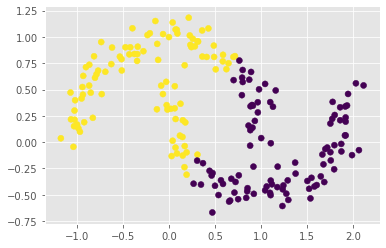

NameError: name 'DBCV' is not defined

In [8]:
#Visualizing clusters
#fig, ax = plt.subplots(figsize=(10,8))
#sctr2 = ax.scatter(X[:,0],X[:,1],c=model.labels_,s=140,alpha=0.9,cmap=plt.cm.Set1)
#fig.show()

from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels)
plt.show()

kmeans_score = DBCV(X, kmeans_labels, dist_function=euclidean)
print(kmeans_score)
print(kmeans_labels)

[[ 2.81714569e-01  9.10444056e-01]
 [ 8.38924105e-01 -5.30053378e-01]
 [ 4.09154736e-01  8.09443517e-01]
 [-9.84152132e-01  1.31421552e-01]
 [ 1.15919021e+00  4.91042499e-01]
 [-9.67034864e-01  9.81273018e-02]
 [ 9.17391379e-01 -2.33492700e-01]
 [ 9.78275081e-01  5.01470015e-01]
 [ 1.85907097e+00  3.30871464e-01]
 [ 1.28971276e+00 -3.64160764e-01]
 [ 5.84428413e-01  7.67799476e-01]
 [-7.30832047e-01  4.56298974e-01]
 [ 7.94417589e-01  6.12926580e-01]
 [ 1.79695065e+00 -2.93018722e-02]
 [ 2.32147899e-01  9.24300964e-01]
 [ 1.54806066e+00 -3.39771532e-01]
 [-6.18477556e-01  8.99092698e-01]
 [-6.58859478e-02  4.56605027e-01]
 [ 1.11837392e+00 -4.01525312e-01]
 [ 1.18063952e+00 -2.33470696e-01]
 [ 1.49243452e-01 -1.28066249e-01]
 [-3.43639867e-01  8.37080031e-01]
 [-3.46496873e-01  7.71662626e-01]
 [ 1.10554355e+00 -3.66008783e-01]
 [ 1.77313541e+00  2.20647050e-01]
 [ 1.70382757e-01  7.30566191e-01]
 [-2.33630869e-01  1.01740159e+00]
 [ 1.77765377e+00  3.82306966e-01]
 [ 7.22840616e-01 -3

/Users/ms12122/Environments/myenv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/ms12122/Environments/myenv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'DBCV' is not defined

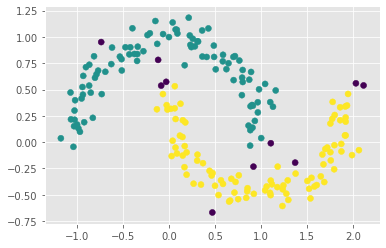

In [9]:
import hdbscan
print(X)
hdbscanner = hdbscan.HDBSCAN()
hdbscan_labels = hdbscanner.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=hdbscan_labels)

hdbscan_score = DBCV(X, hdbscan_labels, dist_function=euclidean)
print(hdbscan_score)

In [10]:
'''
Cluster validation 
DBCV evaluates the within- and between- cluster desnity connectedness of clustering results 
by measuring the least dense region inside and cluster and the most dense region between clusters.
A relative measure for evaluation of of density-based clustering should be defined by means of densities
rather than by distances.

Step1: Define all points core distance (APCD) for each object in a cluster

Step 2: Define mutual reachability distance (MRD) for every pair of points in a cluster 

Step 3: Build a fully connected graph G, for each cluster, based on mutual reachability distance

Step 4: Find the minimum spanning tree of G

Step 5: Using the MST define the density sparseness and density separation of each cluster 
Density sparseness - maximum edge of the MST - can be interpreted as the area with the lowest density inside the cluster
Density separation - minimum MRD between the objects of two clusters - can be interpreted as the maximum density area between the clusters

Step 6: Compute the validity index of a cluster (VC)

Step 7: Compute the validity index of the clustering solution

Note: Distances are Euclidean 
'''

dbscan_score = DBCV(X,model.labels_,dist_function=euclidean)
print(model.labels_)
print(dbscan_score)

NameError: name 'DBCV' is not defined

In [221]:
"""
Implimentation of Density-Based Clustering Validation "DBCV"
Citation:
Moulavi, Davoud, et al. "Density-based clustering validation."
Proceedings of the 2014 SIAM International Conference on Data Mining.
Society for Industrial and Applied Mathematics, 2014.
"""

import numpy as np
from scipy.spatial.distance import euclidean, cdist
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csgraph


def DBCV(X, labels, dist_function=euclidean):
    """
    Density Based clustering validation
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: cluster_validity (float)
        score in range[-1, 1] indicating validity of clustering assignments
    """
    graph = _mutual_reach_dist_graph(X, labels, dist_function)
    mst = _mutual_reach_dist_MST(graph)
    cluster_validity = _clustering_validity_index(mst, labels)
    return cluster_validity


def _core_dist(point, neighbors, dist_function):
    """
    Computes the core distance of a point.
    Core distance is the inverse density of an object.
    Args:
        point (np.array): array of dimensions (n_features,)
            point to compute core distance of
        neighbors (np.ndarray): array of dimensions (n_neighbors, n_features):
            array of all other points in object class
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: core_dist (float)
        inverse density of point
    """
    n_features = np.shape(point)[0]
    n_neighbors = np.shape(neighbors)[1]

    distance_vector = cdist(point.reshape(1, -1), neighbors)
    distance_vector = distance_vector[distance_vector != 0]
    numerator = ((1/distance_vector)**n_features).sum()
    core_dist = (numerator / (n_neighbors)) ** (-1/n_features)
    return core_dist


def _mutual_reachability_dist(point_i, point_j, neighbors_i,
                              neighbors_j, dist_function):
    """.
    Computes the mutual reachability distance between points
    Args:
        point_i (np.array): array of dimensions (n_features,)
            point i to compare to point j
        point_j (np.array): array of dimensions (n_features,)
            point i to compare to point i
        neighbors_i (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point i
        neighbors_j (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point j
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: mutual_reachability (float)
        mutual reachability between points i and j
    """
    core_dist_i = _core_dist(point_i, neighbors_i, dist_function)
    core_dist_j = _core_dist(point_j, neighbors_j, dist_function)
    dist = dist_function(point_i, point_j)
    mutual_reachability = np.max([core_dist_i, core_dist_j, dist])
    return mutual_reachability


def _mutual_reach_dist_graph(X, labels, dist_function):
    """
    Computes the mutual reach distance complete graph.
    Graph of all pair-wise mutual reachability distances between points
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: graph (np.ndarray)
        array of dimensions (n_samples, n_samples)
        Graph of all pair-wise mutual reachability distances between points.
    """
    n_samples = np.shape(X)[0]
    graph = []
    counter = 0
    for row in range(n_samples):
        graph_row = []
        for col in range(n_samples):
            point_i = X[row]
            point_j = X[col]
            class_i = labels[row]
            class_j = labels[col]
            members_i = _get_label_members(X, labels, class_i)
            members_j = _get_label_members(X, labels, class_j)
            dist = _mutual_reachability_dist(point_i, point_j,
                                             members_i, members_j,
                                             dist_function)
            graph_row.append(dist)
        counter += 1
        graph.append(graph_row)
    graph = np.array(graph)
    return graph


def _mutual_reach_dist_MST(dist_tree):
    """
    Computes minimum spanning tree of the mutual reach distance complete graph
    Args:
        dist_tree (np.ndarray): array of dimensions (n_samples, n_samples)
            Graph of all pair-wise mutual reachability distances
            between points.
    Returns: minimum_spanning_tree (np.ndarray)
        array of dimensions (n_samples, n_samples)
        minimum spanning tree of all pair-wise mutual reachability
            distances between points.
    """
    mst = minimum_spanning_tree(dist_tree).toarray()
    return mst + np.transpose(mst)


def _cluster_density_sparseness(MST, labels, cluster):
    """
    Computes the cluster density sparseness, the minimum density
        within a cluster
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_density_sparseness (float)
        value corresponding to the minimum density within a cluster
    """
    indices = np.where(labels == cluster)[0]
    cluster_MST = MST[indices][:, indices]
    cluster_density_sparseness = np.max(cluster_MST)
    return cluster_density_sparseness


def _cluster_density_separation(MST, labels, cluster_i, cluster_j):
    """
    Computes the density separation between two clusters, the maximum
        density between clusters.
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster_i (int): cluster i of interest
        cluster_j (int): cluster j of interest
    Returns: density_separation (float):
        value corresponding to the maximum density between clusters
    """
    indices_i = np.where(labels == cluster_i)[0]
    indices_j = np.where(labels == cluster_j)[0]
    shortest_paths = csgraph.dijkstra(MST, indices=indices_i)
    relevant_paths = shortest_paths[:, indices_j]
    density_separation = np.min(relevant_paths)
    return density_separation


def _cluster_validity_index(MST, labels, cluster):
    """
    Computes the validity of a cluster (validity of assignmnets)
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_validity (float)
        value corresponding to the validity of cluster assignments
    """
    min_density_separation = np.inf
    for cluster_j in np.unique(labels):
        if cluster_j != cluster:
            cluster_density_separation = _cluster_density_separation(MST,
                                                                     labels,
                                                                     cluster,
                                                                     cluster_j)
            if cluster_density_separation < min_density_separation:
                min_density_separation = cluster_density_separation
    cluster_density_sparseness = _cluster_density_sparseness(MST,
                                                             labels,
                                                             cluster)
    numerator = min_density_separation - cluster_density_sparseness
    denominator = np.max([min_density_separation, cluster_density_sparseness])
    cluster_validity = numerator / denominator
    return cluster_validity


def _clustering_validity_index(MST, labels):
    """
    Computes the validity of all clustering assignments for a
    clustering algorithm
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
    Returns: validity_index (float):
        score in range[-1, 1] indicating validity of clustering assignments
    """
    n_samples = len(labels)
    validity_index = 0
    for label in np.unique(labels):
        fraction = np.sum(labels == label) / float(n_samples)
        cluster_validity = _cluster_validity_index(MST, labels, label)
        validity_index += fraction * cluster_validity
    return validity_index


def _get_label_members(X, labels, cluster):
    """
    Helper function to get samples of a specified cluster.
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: members (np.ndarray)
        array of dimensions (n_samples, n_features) of samples of the
        specified cluster.
    """
    indices = np.where(labels == cluster)[0]
    members = X[indices]
    return members